In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_percentage_error

In [2]:
data = pd.read_excel('TS_Data.xlsx')

In [5]:
data = data.tail(-1)

In [8]:
data = data[["Date","Marketing spends"]]
data.columns = ["Date","Value"]

In [9]:
data

,Date,Value
1,2017-01-01,176732
2,2017-02-01,180486
3,2017-03-01,180455
4,2017-04-01,185070
5,2017-05-01,195915
6,2017-06-01,194849
7,2017-07-01,175999
8,2017-08-01,167606
9,2017-09-01,204624
10,2017-10-01,208619


In [11]:
data.isnull().sum()

Date     0
Value    0
dtype: int64

In [20]:
data['Date'] = pd.to_datetime(data['Date'])

In [26]:
data.index = data['Date']

In [29]:
data = data.drop(columns=['Date'])

In [30]:
data

,Value
Date,
2017-01-01,176732
2017-02-01,180486
2017-03-01,180455
2017-04-01,185070
2017-05-01,195915
2017-06-01,194849
2017-07-01,175999
2017-08-01,167606
2017-09-01,204624


In [43]:
result = seasonal_decompose(data['Value'])

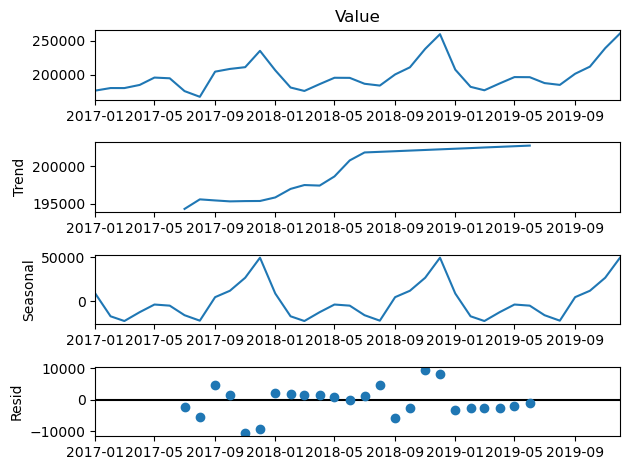

In [44]:
result.plot()
plt.show()

In [47]:
data['dt'] = data.index

In [49]:
type(data['dt'])

pandas.core.series.Series

In [52]:
data['dt'] = pd.to_datetime(data['dt'])

In [57]:
train = data[data['dt'].dt.year<2019]
test = data[data['dt'].dt.year>2018]

In [ ]:
train.drop(columns=['dt'], inplace = True)
test.drop(columns=['dt'], inplace = True)

,Value
Date,
2017-01-01,176732
2017-02-01,180486
2017-03-01,180455
2017-04-01,185070
2017-05-01,195915
2017-06-01,194849
2017-07-01,175999
2017-08-01,167606
2017-09-01,204624


In [67]:
model = LinearRegression()

In [68]:
train.shape

(24, 1)

In [69]:
test.shape

(12, 1)

In [93]:
np.array(range(1,25))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [122]:
train_model = pd.DataFrame(range(1,25), columns=['X'])
train_model['Y'] = train['Value'].values

In [123]:
train_model

,X,Y
0,1,176732
1,2,180486
2,3,180455
3,4,185070
4,5,195915
5,6,194849
6,7,175999
7,8,167606
8,9,204624
9,10,208619


In [124]:
model.fit(train_model[['X']], train_model['Y'])

LinearRegression()

In [125]:
train_model['linear_pred_Trend'] = model.predict(train_model[['X']])

<AxesSubplot:>

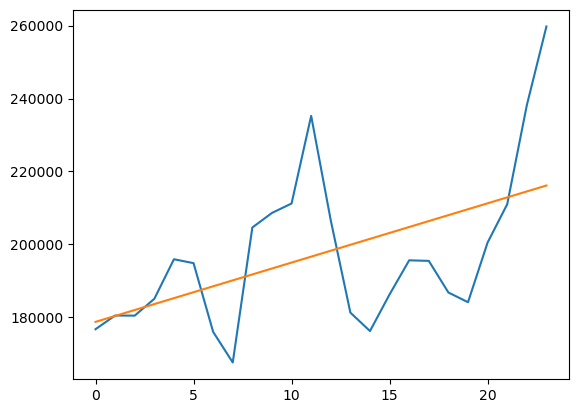

In [126]:
train_model['Y'].plot(kind = 'line')
train_model['linear_pred_Trend'].plot(kind = 'line')

In [131]:
train_model['linear_SI'] = train_model['Y'] / train_model['linear_pred_Trend']

In [133]:
train_model

,X,Y,linear_pred_Trend,linear_SI
0,1,176732,178744.213333,0.988742
1,2,180486,180370.169420,1.000642
2,3,180455,181996.125507,0.991532
3,4,185070,183622.081594,1.007885
4,5,195915,185248.037681,1.057582
5,6,194849,186873.993768,1.042676
6,7,175999,188499.949855,0.933682
7,8,167606,190125.905942,0.881553
8,9,204624,191751.862029,1.067129
9,10,208619,193377.818116,1.078816


In [136]:
train_model['Month_component'] = 2* list(range(1,13)) 

In [140]:
train_model_seasonal_monthly_component = train_model.groupby('Month_component')['linear_SI'].mean()

In [146]:
train_model_seasonal_monthly_component

Month_component
1     1.015345
2     0.953797
3     0.933032
4     0.962459
5     1.006478
6     0.994896
7     0.915848
8     0.879951
9     1.008114
10    1.034985
11    1.096654
12    1.199095
Name: linear_SI, dtype: float64

In [151]:
train_model

,X,Y,linear_pred_Trend,linear_SI,Month_component
0,1,176732,178744.213333,0.988742,1
1,2,180486,180370.169420,1.000642,2
2,3,180455,181996.125507,0.991532,3
3,4,185070,183622.081594,1.007885,4
4,5,195915,185248.037681,1.057582,5
5,6,194849,186873.993768,1.042676,6
6,7,175999,188499.949855,0.933682,7
7,8,167606,190125.905942,0.881553,8
8,9,204624,191751.862029,1.067129,9
9,10,208619,193377.818116,1.078816,10


In [164]:
Average_Seasonality_Factor = pd.DataFrame(train_model_seasonal_monthly_component[train_model['Month_component']]).reset_index()
             

In [166]:
Average_Seasonality_Factor.columns = ["Month_component", "Average_Seasonality_Factor"]

In [167]:
Average_Seasonality_Factor

,Month_component,Average_Seasonality_Factor
0,1,1.015345
1,2,0.953797
2,3,0.933032
3,4,0.962459
4,5,1.006478
5,6,0.994896
6,7,0.915848
7,8,0.879951
8,9,1.008114
9,10,1.034985


In [168]:
train_model['Average_Seasonality_Factor'] = Average_Seasonality_Factor['Average_Seasonality_Factor']


In [169]:
train_model

,X,Y,linear_pred_Trend,linear_SI,Month_component,Average_Seasonality_Factor
0,1,176732,178744.213333,0.988742,1,1.015345
1,2,180486,180370.169420,1.000642,2,0.953797
2,3,180455,181996.125507,0.991532,3,0.933032
3,4,185070,183622.081594,1.007885,4,0.962459
4,5,195915,185248.037681,1.057582,5,1.006478
5,6,194849,186873.993768,1.042676,6,0.994896
6,7,175999,188499.949855,0.933682,7,0.915848
7,8,167606,190125.905942,0.881553,8,0.879951
8,9,204624,191751.862029,1.067129,9,1.008114
9,10,208619,193377.818116,1.078816,10,1.034985


In [170]:
train_model['Actual_Prediction'] = train_model['linear_pred_Trend'] * train_model['Average_Seasonality_Factor']


In [171]:
train_model

,X,Y,linear_pred_Trend,linear_SI,Month_component,Average_Seasonality_Factor,Actual_Prediction
0,1,176732,178744.213333,0.988742,1,1.015345,181487.035546
1,2,180486,180370.169420,1.000642,2,0.953797,172036.517954
2,3,180455,181996.125507,0.991532,3,0.933032,169808.288636
3,4,185070,183622.081594,1.007885,4,0.962459,176728.675979
4,5,195915,185248.037681,1.057582,5,1.006478,186448.118822
5,6,194849,186873.993768,1.042676,6,0.994896,185920.184798
6,7,175999,188499.949855,0.933682,7,0.915848,172637.219993
7,8,167606,190125.905942,0.881553,8,0.879951,167301.548446
8,9,204624,191751.862029,1.067129,9,1.008114,193307.831913
9,10,208619,193377.818116,1.078816,10,1.034985,200143.066045


In [176]:
print("Linear Prediction MAPE : ")
print(mean_absolute_percentage_error(train_model['Y'],train_model['linear_pred_Trend'] ))
print("Linear with Seasonality Prediction MAPE")
print(mean_absolute_percentage_error(train_model['Y'],train_model['Actual_Prediction'] ))

Linear Prediction MAPE : 
0.07363104968072369
Linear with Seasonality Prediction MAPE
0.0351513178643388


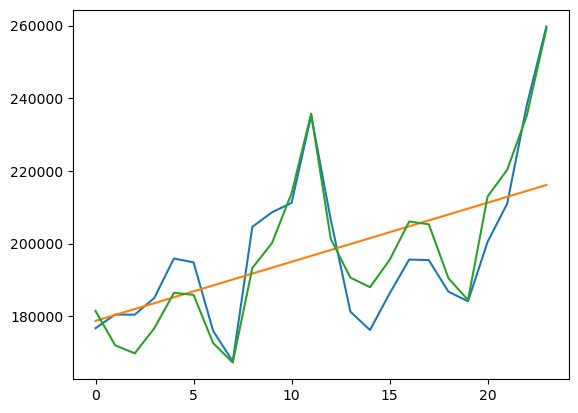

In [172]:
train_model['Y'].plot(kind = 'line')
train_model['linear_pred_Trend'].plot(kind = 'line')
train_model['Actual_Prediction'].plot(kind = 'line')
plt.show()

In [178]:
test_model = pd.DataFrame(range(25,37), columns=['X'])
test_model['Y'] = test['Value'].values

In [179]:
test_model

,X,Y
0,25,207572
1,26,182283
2,27,177225
3,28,187280
4,29,196622
5,30,196471
6,31,187797
7,32,185135
8,33,201510
9,34,212006


In [180]:
model.predict(test_model[['X']])

array([217767.15942029, 219393.11550725, 221019.0715942 , 222645.02768116,
       224270.98376812, 225896.93985507, 227522.89594203, 229148.85202899,
       230774.80811594, 232400.7642029 , 234026.72028986, 235652.67637681])

In [181]:
test_model['linear_pred_Trend'] = model.predict(test_model[['X']])

In [182]:
test_model

,X,Y,linear_pred_Trend
0,25,207572,217767.159420
1,26,182283,219393.115507
2,27,177225,221019.071594
3,28,187280,222645.027681
4,29,196622,224270.983768
5,30,196471,225896.939855
6,31,187797,227522.895942
7,32,185135,229148.852029
8,33,201510,230774.808116
9,34,212006,232400.764203


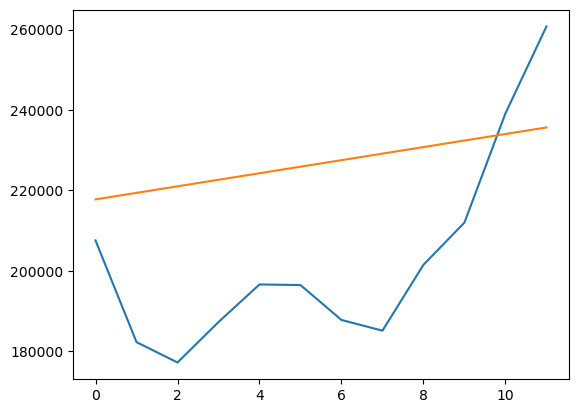

In [184]:
test_model['Y'].plot(kind = 'line')
test_model['linear_pred_Trend'].plot(kind = 'line')
plt.show()

In [185]:
test_model['Month_component'] = list(range(1,13))

In [188]:
test_model

,X,Y,linear_pred_Trend,Month_component
0,25,207572,217767.159420,1
1,26,182283,219393.115507,2
2,27,177225,221019.071594,3
3,28,187280,222645.027681,4
4,29,196622,224270.983768,5
5,30,196471,225896.939855,6
6,31,187797,227522.895942,7
7,32,185135,229148.852029,8
8,33,201510,230774.808116,9
9,34,212006,232400.764203,10


In [189]:
Average_Seasonality_Factor_test = pd.DataFrame(train_model_seasonal_monthly_component[test_model['Month_component']]).reset_index()
             

In [190]:
Average_Seasonality_Factor_test.columns = ["Month_component", "Average_Seasonality_Factor"]

In [191]:
Average_Seasonality_Factor_test

,Month_component,Average_Seasonality_Factor
0,1,1.015345
1,2,0.953797
2,3,0.933032
3,4,0.962459
4,5,1.006478
5,6,0.994896
6,7,0.915848
7,8,0.879951
8,9,1.008114
9,10,1.034985


In [192]:
test_model['Average_Seasonality_Factor'] = Average_Seasonality_Factor_test['Average_Seasonality_Factor']


In [193]:
test_model

,X,Y,linear_pred_Trend,Month_component,Average_Seasonality_Factor
0,25,207572,217767.159420,1,1.015345
1,26,182283,219393.115507,2,0.953797
2,27,177225,221019.071594,3,0.933032
3,28,187280,222645.027681,4,0.962459
4,29,196622,224270.983768,5,1.006478
5,30,196471,225896.939855,6,0.994896
6,31,187797,227522.895942,7,0.915848
7,32,185135,229148.852029,8,0.879951
8,33,201510,230774.808116,9,1.008114
9,34,212006,232400.764203,10,1.034985


In [195]:
test_model['Actal_Forecast_Linear_with_seasonality'] = test_model['linear_pred_Trend'] * test_model['Average_Seasonality_Factor']


In [196]:
test_model

,X,Y,linear_pred_Trend,Month_component,Average_Seasonality_Factor,Actal_Forecast_Linear_with_seasonality
0,25,207572,217767.159420,1,1.015345,221108.787051
1,26,182283,219393.115507,2,0.953797,209256.485018
2,27,177225,221019.071594,3,0.933032,206217.963150
3,28,187280,222645.027681,4,0.962459,214286.651223
4,29,196622,224270.983768,5,1.006478,225723.864896
5,30,196471,225896.939855,6,0.994896,224743.956911
6,31,187797,227522.895942,7,0.915848,208376.290128
7,32,185135,229148.852029,8,0.879951,201639.842709
8,33,201510,230774.808116,9,1.008114,232647.429574
9,34,212006,232400.764203,10,1.034985,240531.214759


In [197]:
print("Linear Prediction MAPE : ")
print(mean_absolute_percentage_error(test_model['Y'],test_model['linear_pred_Trend'] ))
print("Linear with Seasonality Prediction MAPE")
print(mean_absolute_percentage_error(test_model['Y'],test_model['Actal_Forecast_Linear_with_seasonality'] ))

Linear Prediction MAPE : 
0.14895498455326206
Linear with Seasonality Prediction MAPE
0.12145791082633968


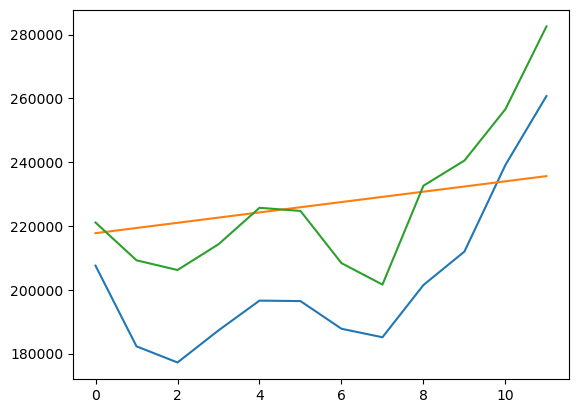

In [198]:
test_model['Y'].plot(kind = 'line')
test_model['linear_pred_Trend'].plot(kind = 'line')
test_model['Actal_Forecast_Linear_with_seasonality'].plot(kind = 'line')
plt.show()